# K Nearest Neighbors with Python

> Data set: `Classified Data.csv`

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

%matplotlib inline

## Loading Data

In [2]:
# Set index_col=0 to use the first column as the index
data = pd.read_csv('./Classified Data.csv', index_col=0)
data.head()

,WTT,PTI,EQW,SBI,LQE,QWG,FDJ,PJF,HQE,NXJ,TARGET CLASS
0,0.913917,1.162073,0.567946,0.755464,0.780862,0.352608,0.759697,0.643798,0.879422,1.231409,1
1,0.635632,1.003722,0.535342,0.825645,0.924109,0.648450,0.675334,1.013546,0.621552,1.492702,0
2,0.721360,1.201493,0.921990,0.855595,1.526629,0.720781,1.626351,1.154483,0.957877,1.285597,0
3,1.234204,1.386726,0.653046,0.825624,1.142504,0.875128,1.409708,1.380003,1.522692,1.153093,1
4,1.279491,0.949750,0.627280,0.668976,1.232537,0.703727,1.115596,0.646691,1.463812,1.419167,1


## Standardizing Variables

In [3]:
# Import StandardScaler to nomalize input data features
# to appropriate scales before using it in KNN models
from sklearn.preprocessing import StandardScaler

In [4]:
scaler = StandardScaler()

In [5]:
# Drop the prediction target column 'TARGET CLASS' to create
# a new DataFrame and pass that new DataFrame to scaler to
# get numerical values be scaled to standardized unit values
scaler.fit(data.drop('TARGET CLASS', axis=1))

StandardScaler()

In [6]:
scaled_features = scaler.transform(data.drop('TARGET CLASS', axis=1))
scaled_features

array([[-0.12354188,  0.18590747, -0.91343069, ..., -1.48236813,
        -0.9497194 , -0.64331425],
       [-1.08483602, -0.43034845, -1.02531333, ..., -0.20224031,
        -1.82805088,  0.63675862],
       [-0.78870217,  0.33931821,  0.30151137, ...,  0.28570652,
        -0.68249379, -0.37784986],
       ...,
       [ 0.64177714, -0.51308341, -0.17920486, ..., -2.36249443,
        -0.81426092,  0.11159651],
       [ 0.46707241, -0.98278576, -1.46519359, ..., -0.03677699,
         0.40602453, -0.85567   ],
       [-0.38765353, -0.59589427, -1.4313981 , ..., -0.56778932,
         0.3369971 ,  0.01034996]])

In [7]:
# Recreate a DataFrame using the scaled data features and target
data_feat = pd.DataFrame(scaled_features, columns=data.columns[:-1])
data_feat.head()

,WTT,PTI,EQW,SBI,LQE,QWG,FDJ,PJF,HQE,NXJ
0,-0.123542,0.185907,-0.913431,0.319629,-1.033637,-2.308375,-0.798951,-1.482368,-0.949719,-0.643314
1,-1.084836,-0.430348,-1.025313,0.625388,-0.444847,-1.152706,-1.129797,-0.202240,-1.828051,0.636759
2,-0.788702,0.339318,0.301511,0.755873,2.031693,-0.870156,2.599818,0.285707,-0.682494,-0.377850
3,0.982841,1.060193,-0.621399,0.625299,0.452820,-0.267220,1.750208,1.066491,1.241325,-1.026987
4,1.139275,-0.640392,-0.709819,-0.057175,0.822886,-0.936773,0.596782,-1.472352,1.040772,0.276510


## Train Test Split

In [8]:
from sklearn.model_selection import train_test_split

In [9]:
X = scaled_features
y = data['TARGET CLASS']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

## Building a K-Nearest Neighbors Model

In [10]:
from sklearn.neighbors import KNeighborsClassifier, NeighborhoodComponentsAnalysis

In [11]:
# At first, we just set the number of neighbors `n_neighbors` to 1
knn = KNeighborsClassifier(n_neighbors=1)

In [12]:
# Fit our knn model to train data
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=1)

In [13]:
pred = knn.predict(X_test)
pred

array([0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1,
       0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1,
       1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1,
       0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0,
       1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0,
       1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1,
       0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0,
       0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0,
       0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0,
       0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0,
       0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0], d

## Model Evaluation

In [14]:
from sklearn.metrics import classification_report, confusion_matrix, plot_confusion_matrix

In [15]:
# Show classification report
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

           0       0.92      0.94      0.93       142
           1       0.95      0.93      0.94       158

    accuracy                           0.94       300
   macro avg       0.94      0.94      0.94       300
weighted avg       0.94      0.94      0.94       300



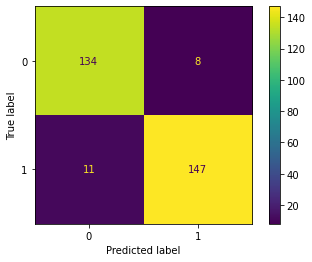

In [16]:
# Plot out confusion metrix
plot_confusion_matrix(knn, X_test, y_test)

## Choosing an Optimal K Value

So far, we have just set `K = 1`, which might not be the best fit for our `KNN` model. Let's use the [elbow method](https://en.wikipedia.org/wiki/Elbow_method_(clustering)) to pick a good `K` value.

In [17]:
# Try KNN with different K values, and save the error rate of
# each tried model to the 'error_rate' array
error_rate = []

for i in range(1, 40):
    # Create and train a new KNN model
    knn_i = KNeighborsClassifier(n_neighbors=i)
    knn_i.fit(X_train, y_train)
    
    # Use the newly created model to predict targets for test data
    pred_i = knn_i.predict(X_test)
    
    # Calculate the mean error: np.mean(pred_i != y_test)
    # Then save that mean error to the 'error_rate' array
    error_rate.append(np.mean(pred_i != y_test))

Text(0, 0.5, 'Error Rate')

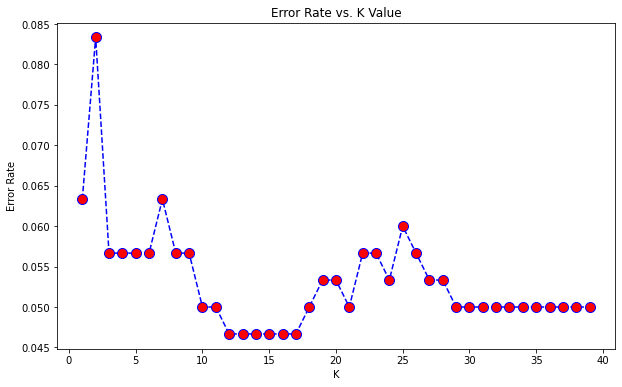

In [18]:
# Plot out the error rates in relation with K
plt.figure(figsize=(10, 6))
plt.plot(
    range(1, 40),
    error_rate,
    color='blue',
    linestyle='dashed',
    marker='o',
    markerfacecolor='red',
    markersize=10
)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')

<font color=magenta>Looking at the above `Error Rate vs. K Value` plot, we can see that when `K` is in between `12` and `17`, the `Error Rate` gets to lowest value around `0.047`. We can, therefore, try to set `K` to `15` (as `12 < 15 < 17`) and retrain our KNN model and compare its evaluation result to the case when `K = 1`.</font>

              precision    recall  f1-score   support

           0       0.92      0.94      0.93       142
           1       0.95      0.93      0.94       158

    accuracy                           0.94       300
   macro avg       0.94      0.94      0.94       300
weighted avg       0.94      0.94      0.94       300



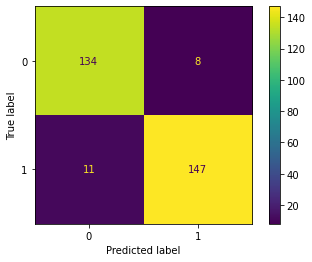

In [19]:
# Just print out the classification report when K = 1
knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(X_train, y_train)
pred = knn.predict(X_test)
print(classification_report(y_test, pred))
plot_confusion_matrix(knn, X_test, y_test)

              precision    recall  f1-score   support

           0       0.94      0.96      0.95       142
           1       0.96      0.95      0.96       158

    accuracy                           0.95       300
   macro avg       0.95      0.95      0.95       300
weighted avg       0.95      0.95      0.95       300



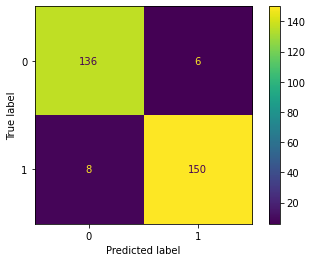

In [20]:
# Print out the classification report when K = 15
knn = KNeighborsClassifier(n_neighbors=15)
knn.fit(X_train, y_train)
pred = knn.predict(X_test)
print(classification_report(y_test, pred))
plot_confusion_matrix(knn, X_test, y_test)